# SC1015 Mini-Project: Spotify Music Recommender System

### By FDDA Group 5
Syed Ali Redha Alsagoff, Huang Yongjian, Ma Jinlin

## Overview
Hello! We are FDDA Group 5 and our SC1015 project is about creating the best Spotify music recommender system that is tailored to our users' taste! Before we get started, please note that the notebook should be viewed in the following order: **Genre Classification Model -> Music Popularity Model -> Music Recommender System**.

As we all know, everybody has different taste in music! This simple idea led us to wonder, what are the **potential factors in one's music preference**? To address this question using machine learning, we have decided to create and compare multiple recommender systems to decide which one is the best in recommending user-tailored music.

But before we can get started with creating and evaluating the various recommender systems, we have a problem! The list of songs we have curated by compiling on Spotify and pulling the data via Spotify API (will be elaborated further in Part 3: Music Recommender System) is **missing the music genres**! Can you imagine a music recommender system that blindly recommends without regards to the song genres that our users are fond of?

To solve this problem, we shall make use of machine learning to **classify our curated songs' music genre**.

## Part 1: Genre Classification Model

For our project, we will be using the Spotify Dataset on kaggle (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data) to train our music genre classification model.

We believe the **music genre is a key factor in a user's music preference**. As the Spotify API is unable to return the specific music genre of each song, we decided to **leverage machine learning** trained on the above labelled dataset to assist in predicting the genres for our curated song list, in order to broaden the features that our music recommender system uses so as to provide **more relevant and up-to-date recommendations** based on user's playlist.


### Importing Libraries

In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In this notebook, we are using the following version of MatplotLib (3.7.1) and Seaborn (0.13.1) to ensure that all the charts (especially for confusion matrix, refer to https://github.com/mwaskom/seaborn/issues/3478#issuecomment-1722369068) are displayed properly.

In [7]:
import matplotlib
print(matplotlib.__version__)
print(sb.__version__)

3.8.0
0.13.2


### Extracting each dataset

In [8]:
dataset1_df = pd.read_csv('dataset.csv')
print(dataset1_df.shape)

(114000, 21)


In [9]:
dataset1_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
print(dataset1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
dataset1_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Data Preparation and Cleaning

For our data cleaning, we will first remove **data with null entries**. This helps to ensure data consistency.

In [12]:
dataset1_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
dataset1_df.dropna(axis=0, how='any',inplace=True)
dataset1_df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Next, we will remove the **duplicate songs** in the dataset. Duplicate songs are characterised as those which share same track name and artists.

In [14]:
dataset1_df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)

We will remove the following garbage/categorical features which are not important for genre classification. Most notably, album name and track name are removed. While these two features may reveal certain naming convention/lyric trends for different genres, we ultimately feel that **their usefulness are at best speculative (as song title/album name does not determine music genre)** and the lyrics itself would convey much more information (but we do not have access to this in the dataset). Furthermore, the **categorical nature of album name and track name** as well as **the massive permutation of the words used** in these categories will unnecessarily overcomplicate the model.

However, we will be keeping the other categorical data features, such as artists, key, time signature and mode. Key, time signature and mode can be easily encoded due to their limited number of permutations. While artists has a lot more permutations, we believe that it is an **important factor in deciding a music genre** as many artists tends to **specialise in specific music genres**.

In [15]:
columns_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name'] #, 'explicit'
#'mode', 'time_signature','popularity'
try:
    dataset1_df.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    print("Already dropped!")

Now, we will proceed to look at the different genres in the dataset.

In [16]:
print("Number of unique genre:", dataset1_df['track_genre'].nunique())
dataset1_df['track_genre'].unique()


Number of unique genre: 113


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Genre classification is a **multinomial classification problem**. We have decided to select the **more prominent genres** and merge the similar ones together into these seven broad categories: **Metal, Rock, Electronic, Hip-Hop/R&B/Soul/Jazz, Pop, Folk/Country/World/Cultural and Instrumentals/Classical**.

We primarily selected genres sung in English, with the exception of K-pop as it is one of the most popular genres in the world today.

In [17]:
genres = {
    'metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore'],
    'rock': ['alt-rock','alternative', 'grunge', 'hard-rock', 'indie', 'punk','punk-rock', 'rock', 'rock-n-roll'],
    'electronic': ['dance', 'drum-and-bass','dubstep', 'edm', 'electro', 'house', 'techno', 'trance'],
    'hip-hop/r&b/soul/jazz': ['hip-hop', 'funk', 'soul', 'r-n-b', 'jazz', 'blues', 'gospel', 'reggae', 'reggaeton'],
    'pop': ['indie-pop', 'k-pop','pop', 'power-pop', 'synth-pop', 'pop-film', 'singer-songwriter'],
    'folk/country/world/cultural': ['bluegrass','country', 'folk', 'salsa', 'world-music'],
    'instrumentals/classical': ['acoustic', 'ambient', 'piano', 'classical', 'opera']

}

result_df = pd.DataFrame()

for genre, subgenres in genres.items():
    genre_data = dataset1_df[dataset1_df['track_genre'].isin(subgenres)]
    result_df = pd.concat([result_df, genre_data], ignore_index=True)
result_df

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Cradle Of Filth,51,430733,False,0.428,0.97200,2,-1.998,0,0.0666,0.000072,0.07360,0.0787,0.2250,118.306,4,black-metal
1,Make Them Suffer,58,275205,True,0.250,0.95200,9,-4.059,0,0.2090,0.000024,0.01350,0.0892,0.1260,143.022,3,black-metal
2,Behemoth,47,301285,False,0.468,0.91300,6,-5.670,1,0.0720,0.026500,0.07690,0.0787,0.1870,109.003,4,black-metal
3,Sadness,41,355474,False,0.144,0.46600,5,-6.715,1,0.0522,0.686000,0.42300,0.0764,0.0737,87.290,4,black-metal
4,Cradle Of Filth,54,302360,False,0.462,0.90500,0,-3.825,0,0.0438,0.000660,0.04020,0.0839,0.2530,122.925,3,black-metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28180,Delta Spirit,30,250360,False,0.589,0.71300,11,-4.879,1,0.0335,0.139000,0.00102,0.1290,0.6260,125.940,4,piano
28181,Oscar Peterson,54,214000,False,0.621,0.19700,7,-14.483,1,0.0573,0.990000,0.87800,0.1520,0.5690,120.194,4,piano
28182,Ben Folds Five,29,254346,False,0.722,0.74600,2,-6.904,0,0.0367,0.101000,0.00000,0.0509,0.6780,112.214,4,piano
28183,Piano Peace,27,188000,False,0.203,0.00547,7,-29.795,1,0.0455,0.991000,0.90100,0.0777,0.1380,69.492,5,piano


In [18]:
# Breakdown of each genre in the cleaned dataset
result_df['track_genre'].value_counts()

black-metal          991
heavy-metal          985
bluegrass            978
acoustic             941
ambient              937
salsa                926
drum-and-bass        915
world-music          880
death-metal          878
k-pop                854
power-pop            833
opera                809
pop-film             808
alt-rock             798
rock-n-roll          773
classical            759
folk                 745
grunge               744
synth-pop            708
piano                688
blues                686
trance               676
metalcore            675
gospel               665
hip-hop              659
hard-rock            626
funk                 621
punk-rock            608
country              570
edm                  510
dance                486
indie-pop            465
singer-songwriter    432
r-n-b                431
techno               401
electro              384
pop                  299
soul                 275
dubstep              253
alternative          238


In [19]:
# Define helper function to map the selected genres to their broad categories
def map_genre_to_group(genre):
    genre_to_category = {
    'metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore'],
    'rock': ['alt-rock','alternative', 'grunge', 'hard-rock', 'indie', 'punk','punk-rock', 'rock', 'rock-n-roll'],
    'electronic': ['dance', 'drum-and-bass','dubstep', 'edm', 'electro', 'house', 'techno', 'trance'],
    'hip-hop/r&b/soul/jazz': ['hip-hop', 'funk', 'soul', 'r-n-b', 'jazz', 'blues', 'gospel', 'reggae', 'reggaeton'],
    'pop': ['indie-pop', 'k-pop','pop', 'power-pop', 'synth-pop', 'pop-film', 'singer-songwriter'],
    'folk/country/world/cultural': ['bluegrass','country', 'folk', 'salsa', 'world-music'],
    'instrumentals/classical': ['acoustic', 'ambient', 'piano', 'classical', 'opera']

    }

    if genre in genre_to_category['metal']:
        return 'Metal'
    elif genre in genre_to_category['rock']:
        return 'Rock'
    elif genre in genre_to_category['electronic']:
        return 'Electronic'
    elif genre in genre_to_category['hip-hop/r&b/soul/jazz']:
        return 'Hip-Hop/R&B/Soul/Jazz'
    elif genre in genre_to_category['pop']:
        return 'Pop'
    elif genre in genre_to_category['folk/country/world/cultural']:
        return 'Folk/Country/World/Cultural'
    elif genre in genre_to_category['instrumentals/classical']:
        return 'Instrumentals/Classical'



In [20]:
# Apply the mapping function to the 'track_genre' column
result_df['track_genre'] = result_df['track_genre'].apply(map_genre_to_group)

In [21]:
num_unique_genres = result_df['track_genre'].nunique()
print(f"Number of unique genre groups: {num_unique_genres}")



Number of unique genre groups: 7


In [22]:
# Breakdown of each categories after grouping the genres
genre_count = result_df['track_genre'].value_counts()
genre_count

Pop                            4399
Rock                           4269
Instrumentals/Classical        4134
Folk/Country/World/Cultural    4099
Hip-Hop/R&B/Soul/Jazz          3783
Electronic                     3759
Metal                          3742
Name: track_genre, dtype: int64

In [23]:
print(result_df.shape)

(28185, 17)


Our cleaned data now looks like this.

In [23]:
result_df.head()

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Cradle Of Filth,51,430733,False,0.428,0.972,2,-1.998,0,0.0666,0.000072,0.0736,0.0787,0.2250,118.306,4,Metal
1,Make Them Suffer,58,275205,True,0.250,0.952,9,-4.059,0,0.2090,0.000024,0.0135,0.0892,0.1260,143.022,3,Metal
2,Behemoth,47,301285,False,0.468,0.913,6,-5.670,1,0.0720,0.026500,0.0769,0.0787,0.1870,109.003,4,Metal
3,Sadness,41,355474,False,0.144,0.466,5,-6.715,1,0.0522,0.686000,0.4230,0.0764,0.0737,87.290,4,Metal
4,Cradle Of Filth,54,302360,False,0.462,0.905,0,-3.825,0,0.0438,0.000660,0.0402,0.0839,0.2530,122.925,3,Metal


## Exploratory Data Analysis

First, let us visualise the genre distribution found earlier using a bar chart.

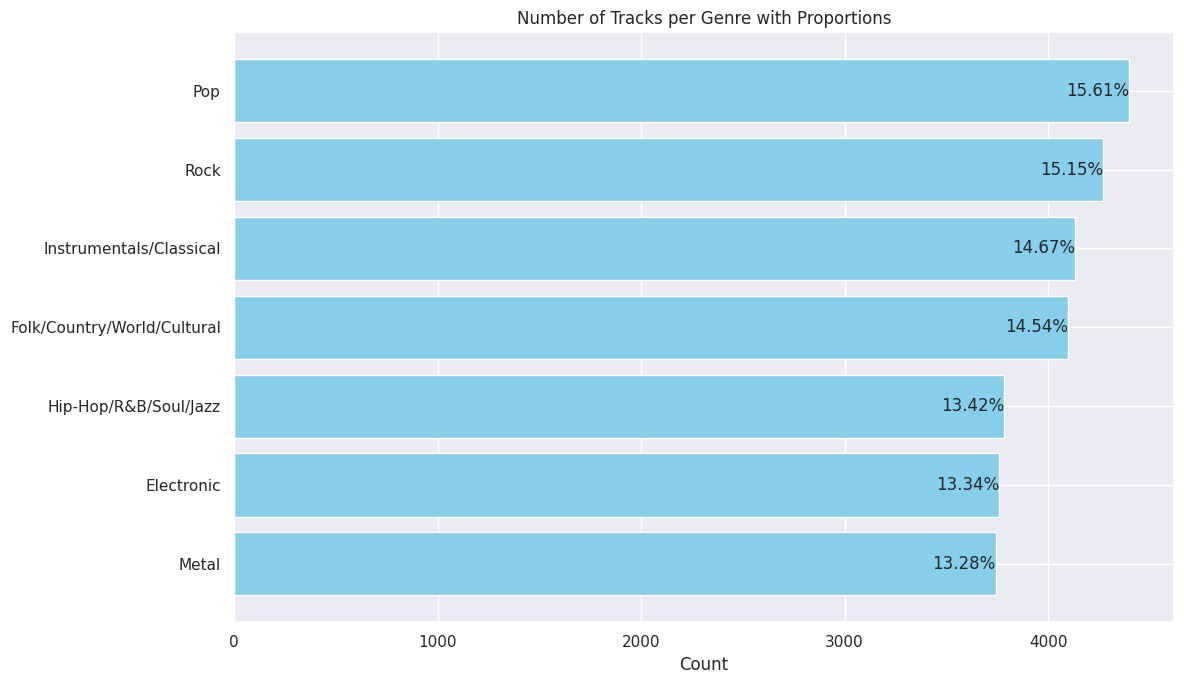

Mean: 14.29%
Standard deviation: 0.95%


In [24]:
total_samples = genre_count.sum()
genre_proportions = genre_count / total_samples

plt.figure(figsize=(12, 7))
bars = plt.barh(genre_count.index, genre_count.values, color='skyblue')

# Add the data labels for each bar
for bar, proportion in zip(bars, genre_proportions):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{proportion:.2%}',
        va='center',
        ha='right'
    )

plt.xlabel('Count')
plt.title('Number of Tracks per Genre with Proportions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Statistical measures
mean_proportion = genre_proportions.mean()
std_deviation = genre_proportions.std()

# Output the results
print(f"Mean: {mean_proportion:.2%}")
print(f"Standard deviation: {std_deviation:.2%}")




We can see that our genre distribution only had **minor imbalances**, with proportions ranging from about 13.28% to 15.61%. For a music genre classification task intended to label songs for a recommender system, we believe that achieving a perfect balance in the dataset is not necessary, especially since the distribution of music genres of all existing songs in the world today is **unlikely to be uniform**.

Now we will look at the number of data columns as well as the statistical description of the cleaned data. We will also plot histogram to visualise the distribution of remaining data columns (except Artists)

In [25]:
print(result_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28185 entries, 0 to 28184
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           28185 non-null  object 
 1   popularity        28185 non-null  int64  
 2   duration_ms       28185 non-null  int64  
 3   explicit          28185 non-null  bool   
 4   danceability      28185 non-null  float64
 5   energy            28185 non-null  float64
 6   key               28185 non-null  int64  
 7   loudness          28185 non-null  float64
 8   mode              28185 non-null  int64  
 9   speechiness       28185 non-null  float64
 10  acousticness      28185 non-null  float64
 11  instrumentalness  28185 non-null  float64
 12  liveness          28185 non-null  float64
 13  valence           28185 non-null  float64
 14  tempo             28185 non-null  float64
 15  time_signature    28185 non-null  int64  
 16  track_genre       28185 non-null  object

In [26]:
result_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,28185.000000,2.818500e+04,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000,28185.000000
mean,38.513039,2.396925e+05,0.525429,0.642621,5.267908,-8.291225,0.654745,0.069755,0.312660,0.146108,0.204759,0.446444,123.249366,3.894093
std,21.515251,1.055270e+05,0.170104,0.264708,3.546206,5.460173,0.475460,0.068914,0.343748,0.300412,0.177149,0.258779,30.401953,0.431961
min,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-43.957000,0.000000,0.000000,0.000000,0.000000,0.009860,0.000000,0.000000,0.000000
25%,23.000000,1.844130e+05,0.412000,0.465000,2.000000,-9.707000,0.000000,0.034300,0.007180,0.000000,0.097700,0.228000,99.487000,4.000000
50%,39.000000,2.241600e+05,0.531000,0.693000,5.000000,-6.832000,1.000000,0.045100,0.151000,0.000071,0.130000,0.421000,122.274000,4.000000
75%,56.000000,2.749330e+05,0.650000,0.870000,8.000000,-4.928000,1.000000,0.073400,0.606000,0.035200,0.262000,0.650000,143.131000,4.000000
max,100.000000,4.246206e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,1.000000,0.994000,243.372000,5.000000


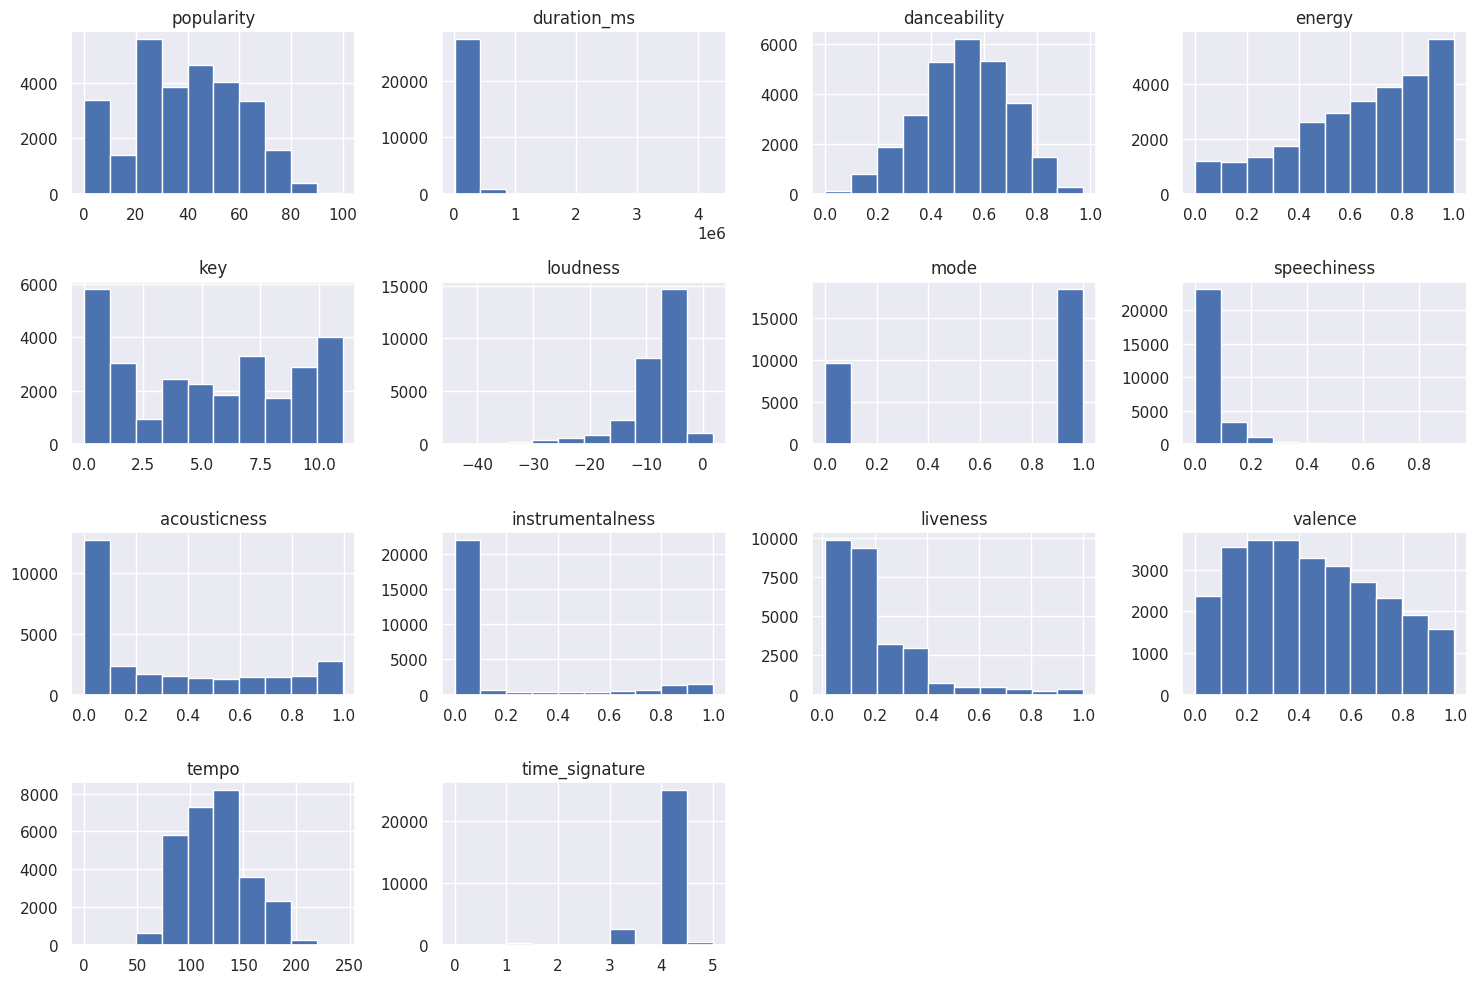

In [27]:
result_df.hist(bins=10, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

We will now be looking at the data distribution for the continuous and categorical features present. This will help us to identify features that might not be useful and can be removed from training. These variables are characterised as having similar distribution between the different genre categories.

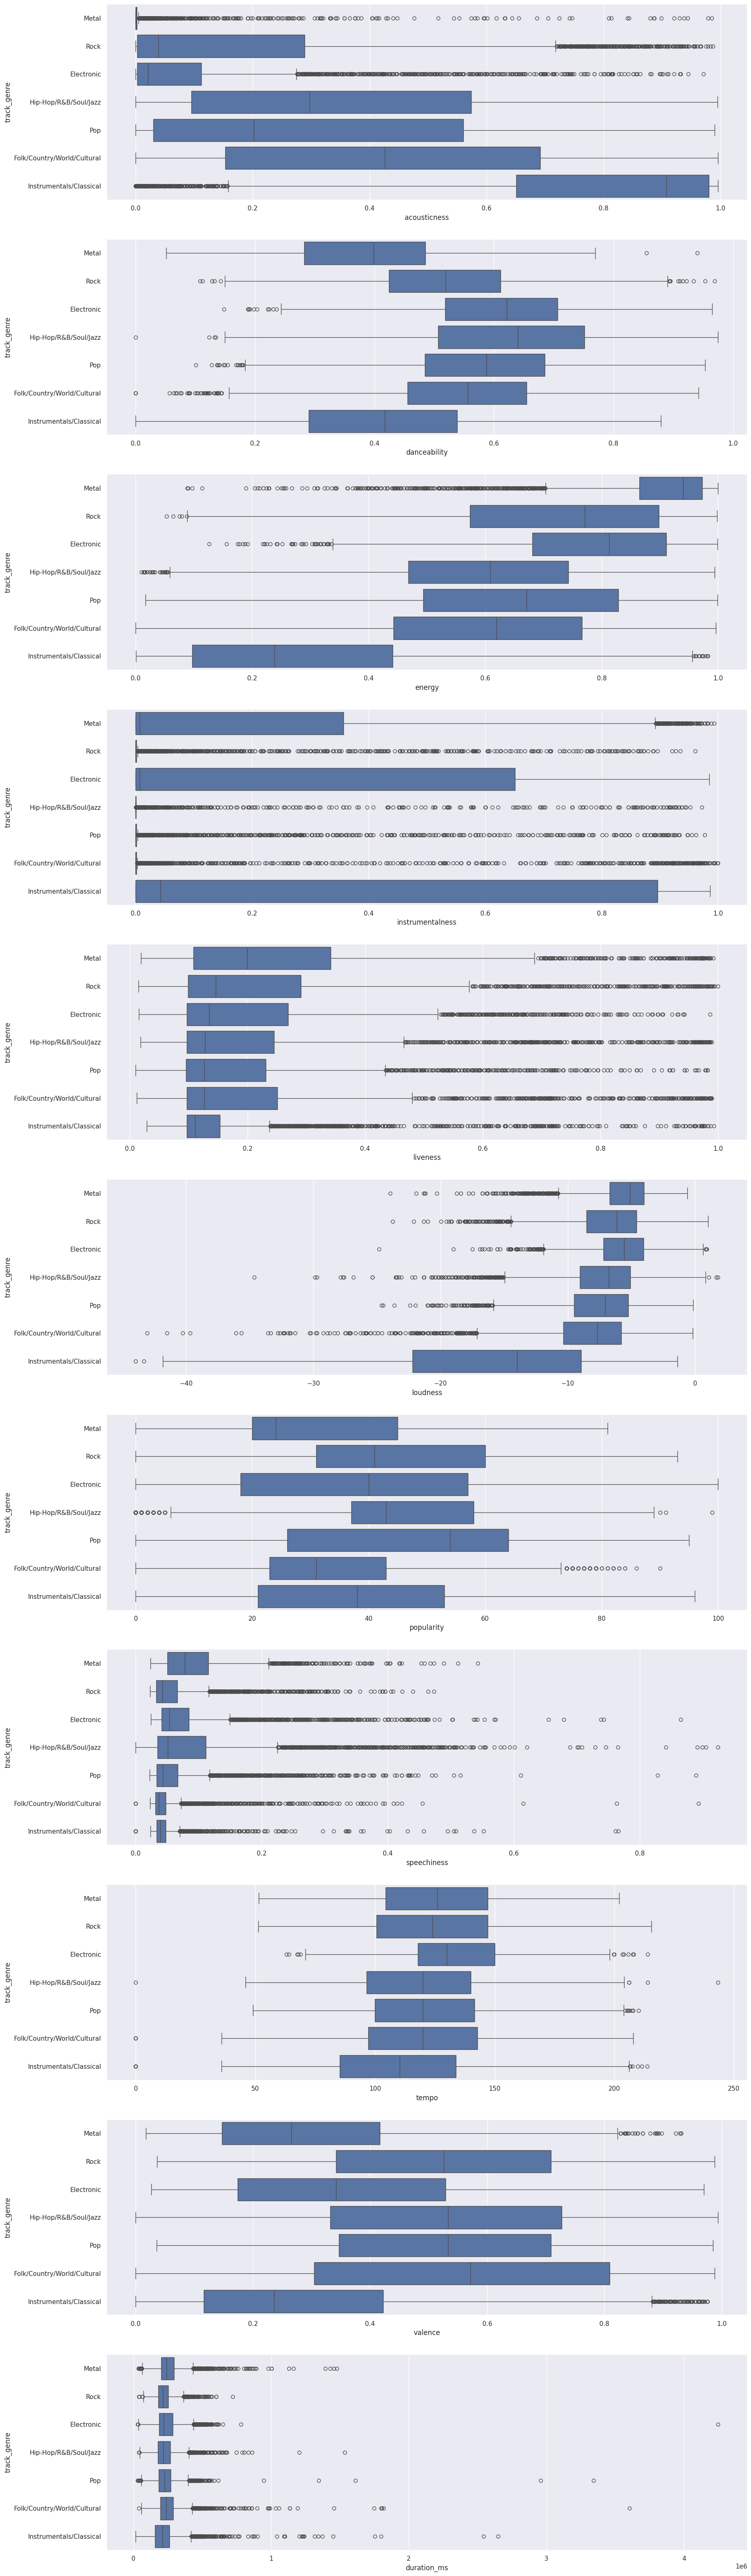

In [28]:
continuous_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'popularity', 'speechiness','tempo', 'valence', 'duration_ms']

f, axes = plt.subplots(11, 1, figsize=(20, 80))

for i, col in enumerate(continuous_cols):
    sb.boxplot(x=col, y='track_genre', data=result_df, ax=axes[i])

plt.show()


We can see that tempo and duration_ms shares similar distribution when compared between different genres. As such, we will not be using these features for classification as they are not very useful in helping us differentiate between the different genres.

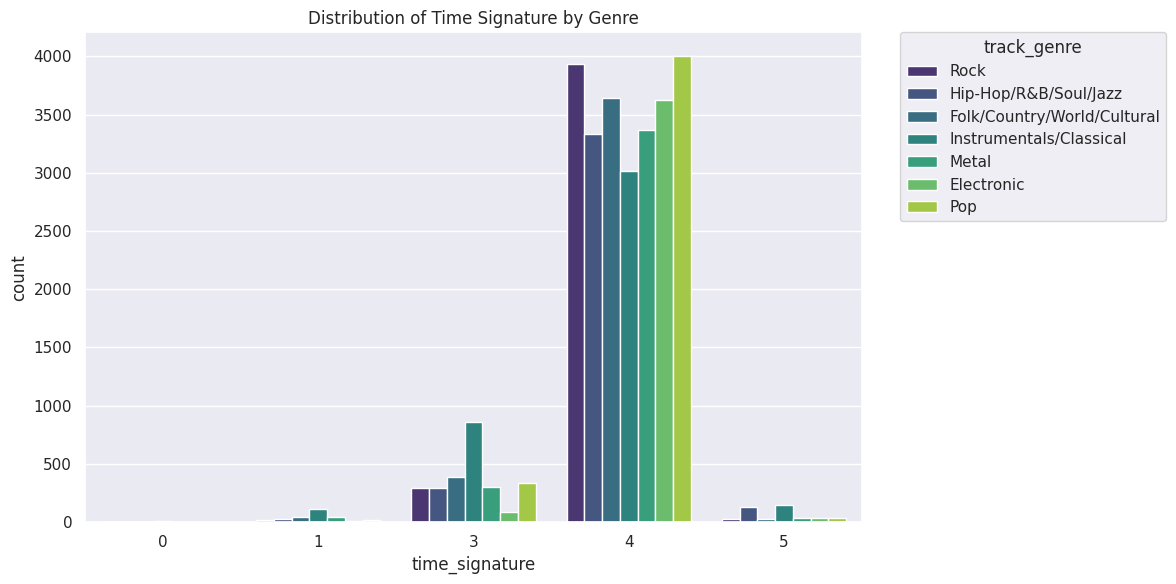

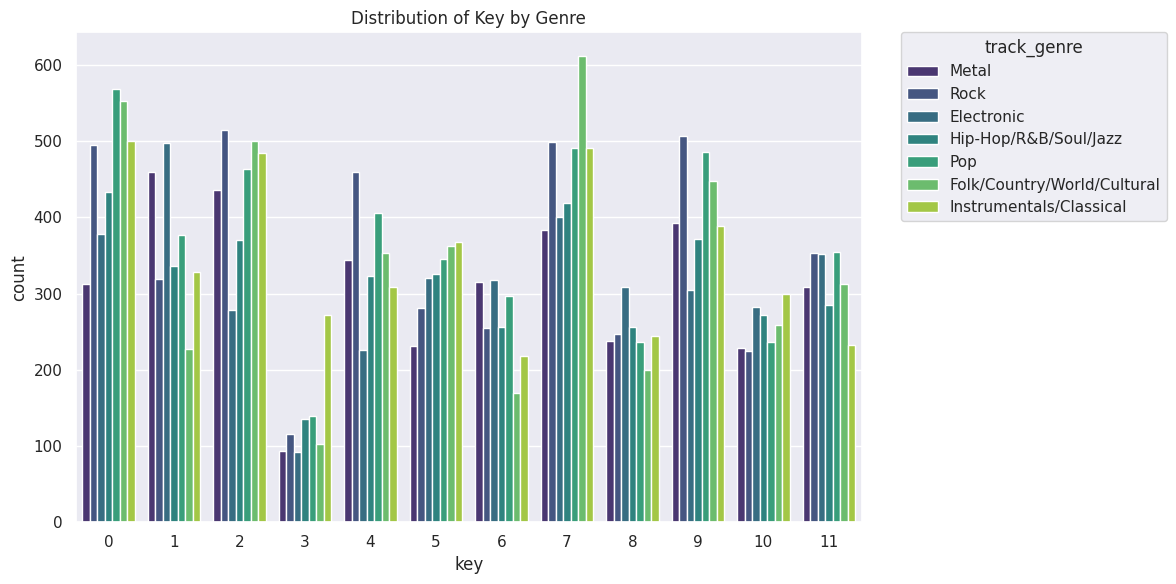

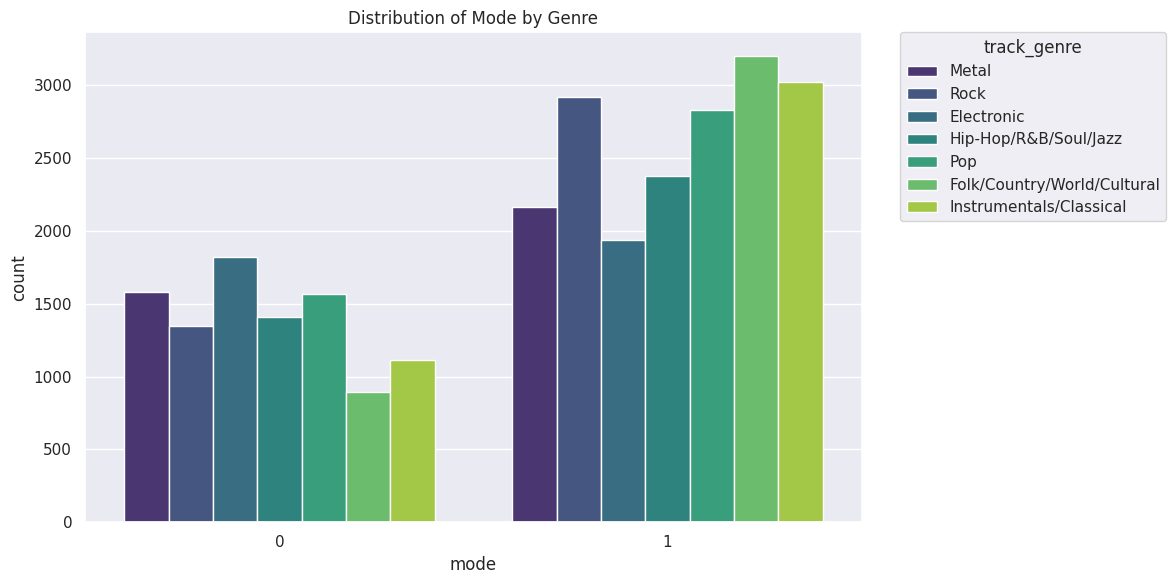

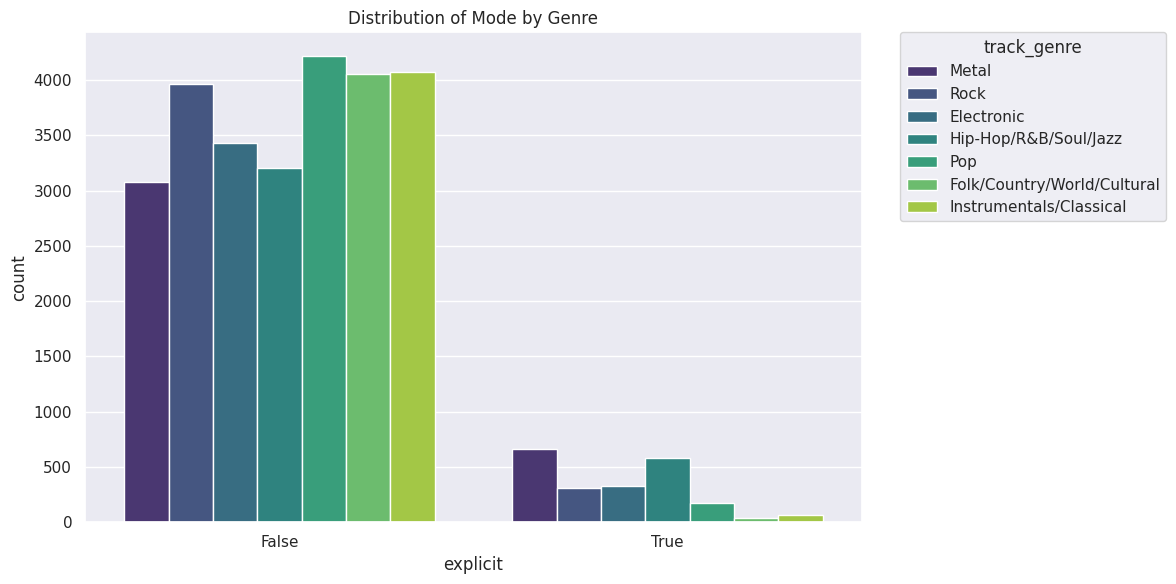

In [29]:
# Create a function to plot the distribution of a categorical variable grouped by genre
def plot_categorical_distribution(df, categorical_var, hue_var, title):
    plt.figure(figsize=(12, 6))
    sb.countplot(data=df, x=categorical_var, hue=hue_var, palette='viridis')
    plt.title(title)
    plt.legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()

categorical_cols= ['time_signature','key', 'mode', 'explicit']

# Plotting the distribution of each categorical variable against genres
plot_categorical_distribution(result_df, 'time_signature', 'track_genre', 'Distribution of Time Signature by Genre')
plot_categorical_distribution(result_df, 'key', 'track_genre', 'Distribution of Key by Genre')
plot_categorical_distribution(result_df, 'mode', 'track_genre', 'Distribution of Mode by Genre')
plot_categorical_distribution(result_df, 'explicit', 'track_genre', 'Distribution of Mode by Genre')


For our categorical features, we can see that there are still some inter-group variance between each genre categories, as such we will be keeping all of them for the subsequent classification.

## Data Preprocessing: Feature Scaling and Engineering

### Importing Machine Learning Libraries

In [57]:
# For data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer, MultiLabelBinarizer
# For test/train split
from sklearn.model_selection import train_test_split
# For model evaluation
from sklearn.metrics import accuracy_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

We will first split the data columns into continuous and categorical variables. This is necessary as they will be preprocessed differently subsequently.

In [31]:
# Exclude tempo and duration_ms as explained above
continuous_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'popularity', 'speechiness', 'valence']

# Exclude mode since it is already binary encoded, explicit will be separately label encoded
categorical_cols= ['time_signature','key']


Over here, we have created a wrapper class for MultiLabelBinarizer that is able to **ignore unseen labels**. This is done as we want to prevent data leakage from the test dataset when encoding the target variables and the default MultiLabelBinarizer from Scikit-Learn does not have this built-in functionality.

We will be applying CustomMultiLabelBinarizer to our artists column. This will create new features which represents the artists in the training set, which we believe are important in deciding a music genre. We did not use other ways of encoding, such as LabelEncoder, as many of the songs have **multiple artists** and this information will be lost since **it cannot identify multiple labels belonging to the same data entry**. As such, this makes MultLabelBinarizer apt for our case since it is able to apply **One-Hot Encoding on multiple labels in the same data entry**.

In [32]:
class CustomMultiLabelBinarizer:
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    # Fit the Scikit-Learn MultiLabelBinarizer to the data
    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self


    # Transform the data while ignoring unseen labels
    def transform(self, X):
        try:
            return self.mlb.transform(X)
        except ValueError as e:  # Handle the case where there are unseen labels in X (test dataset) compared to fitted labels
            unseen = set(x for sublist in X for x in sublist) - set(self.mlb.classes_)
            X_filtered = [[x for x in sublist if x not in unseen] for sublist in X]
            return self.mlb.transform(X_filtered)



    # Fit and transfrom data
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

    # Return feature names for output columns
    def get_feature_names(self):
        return self.mlb.classes_

In order for us to apply our custom MultiLabelBinarizer to the artists column, we will be splitting each column data into its list of artists (the delimiter is semicolon ';').

In [33]:
df = result_df.copy()

df['artists'] =df['artists'].str.split(';')

df

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,[Cradle Of Filth],51,430733,False,0.428,0.97200,2,-1.998,0,0.0666,0.000072,0.07360,0.0787,0.2250,118.306,4,Metal
1,[Make Them Suffer],58,275205,True,0.250,0.95200,9,-4.059,0,0.2090,0.000024,0.01350,0.0892,0.1260,143.022,3,Metal
2,[Behemoth],47,301285,False,0.468,0.91300,6,-5.670,1,0.0720,0.026500,0.07690,0.0787,0.1870,109.003,4,Metal
3,[Sadness],41,355474,False,0.144,0.46600,5,-6.715,1,0.0522,0.686000,0.42300,0.0764,0.0737,87.290,4,Metal
4,[Cradle Of Filth],54,302360,False,0.462,0.90500,0,-3.825,0,0.0438,0.000660,0.04020,0.0839,0.2530,122.925,3,Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28180,[Delta Spirit],30,250360,False,0.589,0.71300,11,-4.879,1,0.0335,0.139000,0.00102,0.1290,0.6260,125.940,4,Instrumentals/Classical
28181,[Oscar Peterson],54,214000,False,0.621,0.19700,7,-14.483,1,0.0573,0.990000,0.87800,0.1520,0.5690,120.194,4,Instrumentals/Classical
28182,[Ben Folds Five],29,254346,False,0.722,0.74600,2,-6.904,0,0.0367,0.101000,0.00000,0.0509,0.6780,112.214,4,Instrumentals/Classical
28183,[Piano Peace],27,188000,False,0.203,0.00547,7,-29.795,1,0.0455,0.991000,0.90100,0.0777,0.1380,69.492,5,Instrumentals/Classical


In [34]:
mlb_artists = CustomMultiLabelBinarizer()

features_columns = df.columns.difference(['track_genre'])
X = df[features_columns]
y = df['track_genre']

lb = LabelEncoder()
y_encoded = lb.fit_transform(y)
genres_label = lb.inverse_transform([0,1,2,3,4,5,6])
print(genres_label)



['Electronic' 'Folk/Country/World/Cultural' 'Hip-Hop/R&B/Soul/Jazz'
 'Instrumentals/Classical' 'Metal' 'Pop' 'Rock']


From above, we can see the numerical mapping for each of our genre categories. They are simply numbered from 0 to 6 based on alphabetical order.

### Test/Train Split with Feature Scaling

We will be applying **StandardScaler** to standardise our continuous variables. We will also apply **Labelbinarizer** to our categorical variables (except for Mode and Artists). Mode and artists are not included since Mode is already a **binary variable** and the artists will be encoded separately as explained above.

To help us manage the different preprocessing techniques being applied to each feature, we will be creating a preprocessing pipeline using the **DataFrameMapper from the sklearn-pandas library**. This provides a convenient way to apply different transformations to different columns of the DataFrame, allowing for customisable preprocessing pipelines.

In [35]:
!pip install sklearn-pandas

Do note that this will take longer to run (Takes about 50 minutes to run on personal laptop) It is recommended to run this on **GPU/TPU enabled environment such as Google Colab** to speed up computation.

It is also normal to see user warning as there will be unseen labels in the test dataset that will not be part of our model's feature in order to prevent data leakage.

In [36]:
from sklearn_pandas import DataFrameMapper
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=10)

mapper = DataFrameMapper(
    [([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
    [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols] +
    [('mode', None)] +
    [('explicit', LabelEncoder())] +
    [('artists', mlb_artists)], df_out=True)

X_train_scaled = mapper.fit_transform(X_train)
X_test_scaled = mapper.transform(X_test)

X_train_scaled.columns = [col.replace('artists_', '').replace('[', '').replace(']', '').replace('<', '') for col in X_train_scaled.columns]
X_test_scaled.columns = [col.replace('artists_', '').replace('[', '').replace(']', '').replace('<', '') for col in X_test_scaled.columns]

X_train_scaled = X_train_scaled.loc[:, ~X_train_scaled.columns.duplicated()]
X_test_scaled = X_test_scaled.loc[:, ~X_test_scaled.columns.duplicated()]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['$pyda', "'Til Tuesday", '(DOLCH)', '257ers', '2nd Grade', '32 Leaves', '347aidan', '3x7 Veintiuna', '9mm Parabellum Bullet', 'A Boogie Wit da Hoodie', 'A R I Z O N A', 'A*M*E', 'A-Tech', 'A.M.C.', 'AK Bhuker', 'AKLO', 'ALI', 'AN21', 'AR Paisley', 'ARIETE', 'AVOID', 'Aastha Gill', 'Abbath', 'Abby Cates', 'Abelation', 'Abhijeet Srivastava', 'Abraham Mateo', 'Abrar Ul Haq', 'Abstract Void', 'Absu', 'Aché Cubano', 'Adalberto Álvarez y su Son', 'Adam Ten', 'Adan La Amenaza', 'Adekunle Gold', 'Adele', 'Adema', 'Aditi Singh Sharma', 'Advaita', 'Agnes', 'Aidan Hawken', 'Air Lyndhurst String Orchestra', 'Aires 085', 'Aishwarya', 'Ajoy Chakrabarty', 'Akemi Fox', 'Akīn', 'Alain Buet', 'Alain Chamfort', 'Alan Piz Morán', 'Ale Sergi', 'Alejandra Guzman', 'Alejandro González', 'Alejandro Medina', 'Alejandro Sanz', 'Aleksey Glyzin', 'Aleksy Wysocki', 'Alesana', 'Alessandra Amoroso', 'Alex & S

In [37]:
X_test_scaled


,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,valence,time_signature_0,...,Кипелов,Колыбельная-земля,Перемотка,Театр Теней,ノーマニ,大滝詠一,石丸由佳,詹雯婷,野村義男Band,黄霄雲
6838,-0.714540,0.337797,0.983704,-0.484524,-0.442397,0.609125,-0.158376,-0.334105,1.112330,0,...,0,0,0,0,0,0,0,0,0,0
18634,-0.859740,-1.327593,1.294560,-0.483855,0.759901,0.968783,-0.806689,0.467548,-0.381979,0,...,0,0,0,0,0,0,0,0,0,0
8326,-0.813381,-0.729460,-0.900382,-0.484536,0.517183,0.114481,-1.779159,-0.463173,-1.338182,0,...,0,0,0,0,0,0,0,0,0,0
13457,1.003955,-0.078551,-0.388608,-0.484536,-0.583512,-0.028609,0.026856,-0.632395,0.078702,0,...,0,0,0,0,0,0,0,0,0,0
12026,0.382918,-1.826037,-0.490962,-0.484514,-0.515777,0.312818,0.628861,-0.437359,-0.962669,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8196,-0.693547,-0.125463,0.536376,-0.484536,0.195442,0.638406,1.832871,0.481889,0.210325,0,...,0,0,0,0,0,0,0,0,0,0
24059,-0.051517,0.584087,-0.870054,-0.484536,-0.301282,-0.079436,1.647639,-0.480382,0.856826,0,...,0,0,0,0,0,0,0,0,0,0
9078,-0.901522,0.930066,1.218741,2.266554,-0.690759,0.440991,-0.991921,0.697001,1.507199,0,...,0,0,0,0,0,0,0,0,0,0
27652,1.992367,0.320205,-2.007329,2.573714,-0.532711,-3.618740,1.045634,-0.306858,-0.862016,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning Evaluation

For our model evaluation, we will be mainly looking at **classification accuracy** given that our dataset is relatively balanced. This is because we want a model that can correctly identify the genres for as many songs as possible.

We will also be plotting the **“Area Under the Curve” of the “Receiver Operating Characteristic” curve (AUC-ROC)**. ROC is a probability curve and AUC represents **the degree of separability**, which represents how much the model is able to distinguish between classes. The higher the AUC, the better model is at differentiating between different labels.

### Extreme Gradient Boosting (XGBoost)
XGBoost, known for its performance in classification task and many more, is a popular state-of-the-art tree-based ensemble technique that uses gradient boosting to combine multiple weak models to form a more robust one[1]. 

To apply the Extreme Gradient Boosting Model, we will need to install the following dependency.

In [38]:
!pip install xgboost

In [39]:
import xgboost as xgb

# Initialize the model
xgb_clf = xgb.XGBClassifier(n_estimators=300, random_state=10)

# Train the model
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb * 100:.5f}%')
print(classification_report(y_test, y_pred_xgb, digits=5, target_names = genres_label))

Accuracy: 81.52405%
                             precision    recall  f1-score   support

                 Electronic    0.80567   0.83099   0.81813       923
Folk/Country/World/Cultural    0.82290   0.81178   0.81730      1036
      Hip-Hop/R&B/Soul/Jazz    0.75499   0.78043   0.76750       920
    Instrumentals/Classical    0.91650   0.87853   0.89712      1062
                      Metal    0.88805   0.88424   0.88614       933
                        Pop    0.77064   0.77348   0.77206      1086
                       Rock    0.75668   0.75529   0.75599      1087

                   accuracy                        0.81524      7047
                  macro avg    0.81649   0.81639   0.81632      7047
               weighted avg    0.81624   0.81524   0.81562      7047



[[767   7  38   3  27  48  33]
 [ 15 841  57  39   1  39  44]
 [ 34  22 718  18   3  67  58]
 [ 12  46  15 933   5  31  20]
 [ 29   4   7   6 825   7  55]
 [ 46  44  62   9  31 840  54]
 [ 49  58  54  10  37  58 821]]


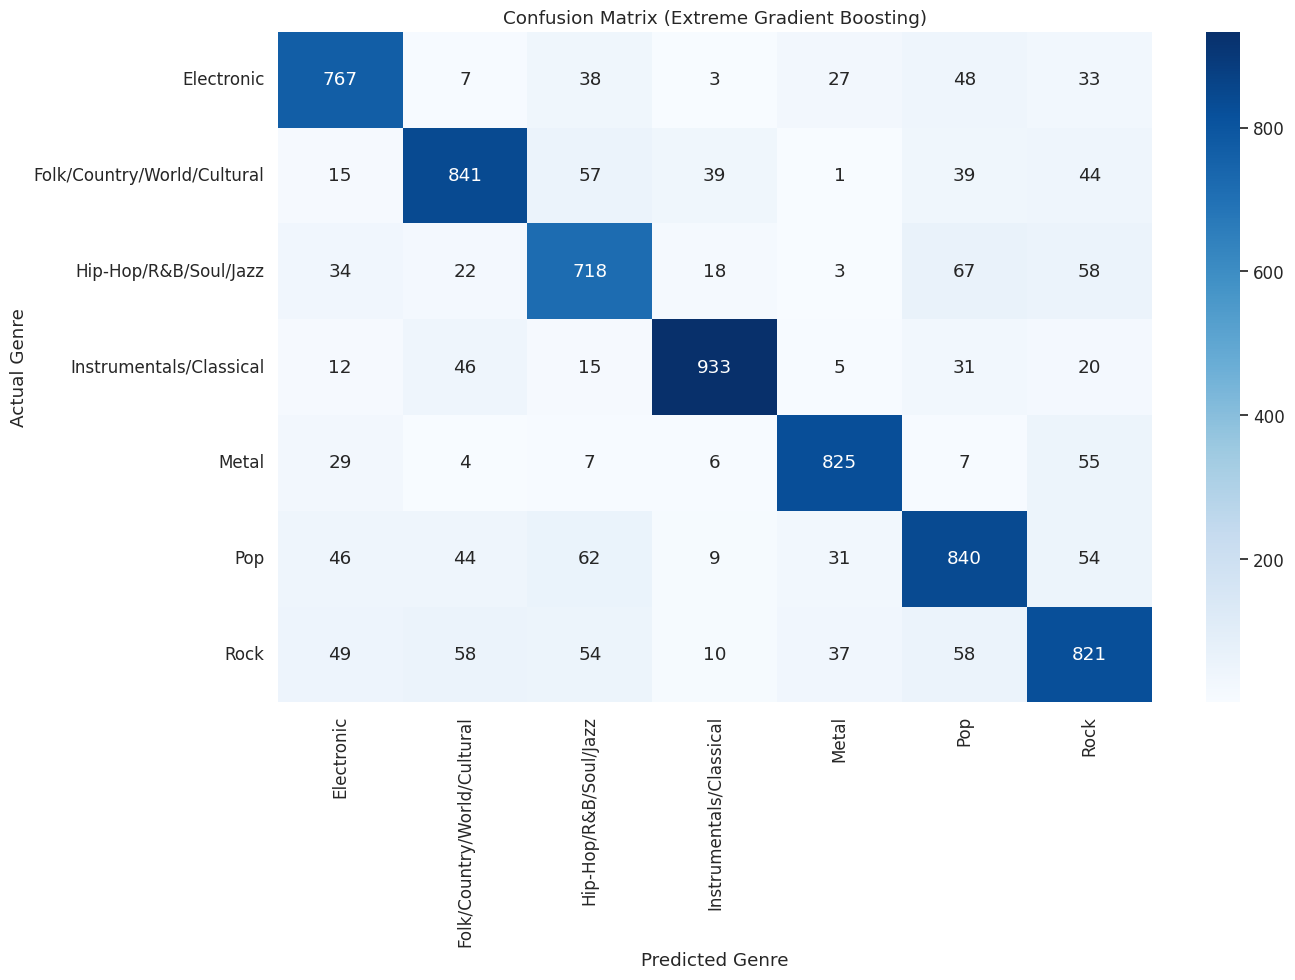

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix)

plt.figure(figsize=(14, 10))
sb.set(font_scale=1.1)

# Generate the heatmap
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=genres_label, yticklabels=genres_label)
plt.title('Confusion Matrix (Extreme Gradient Boosting)')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.tight_layout()
plt.show()


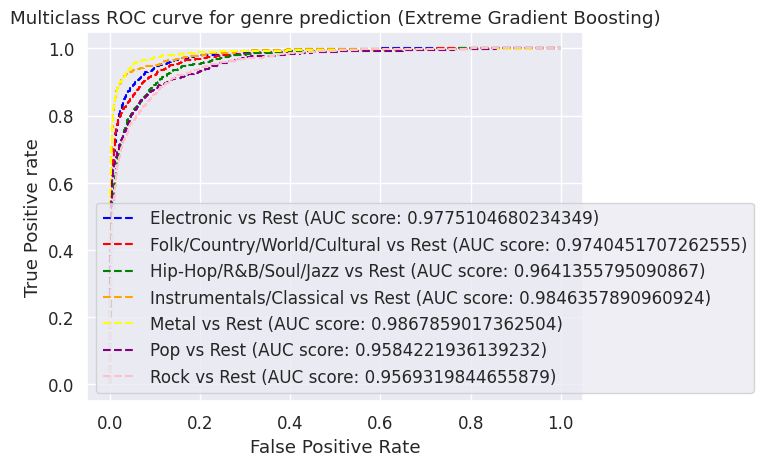

In [42]:
# Get the probability predictions for each genre
y_scores = xgb_clf.predict_proba(X_test_scaled)
n_classes = 7

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = 7
class_labels = genres_label
colours = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'pink']

# Generate ROC curve of each genre against others with AOC score
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_scores[:,i], pos_label = i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colours[i], label=f'{class_labels[i]} vs Rest (AUC score: {roc_auc[i]})')

plt.title('Multiclass ROC curve for genre prediction (Extreme Gradient Boosting)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Random Forest
Random Forest is a machine learning technique commonly used in classification task by combining the outputs from different decision trees into one.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=300, random_state=10)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf * 100:.5f}%')
print(classification_report(y_test, y_pred_rf, digits=5, target_names = genres_label))

Accuracy: 73.86122%
                             precision    recall  f1-score   support

                 Electronic    0.82598   0.73023   0.77516       923
Folk/Country/World/Cultural    0.69324   0.77220   0.73059      1036
      Hip-Hop/R&B/Soul/Jazz    0.72973   0.64565   0.68512       920
    Instrumentals/Classical    0.80633   0.83898   0.82234      1062
                      Metal    0.77031   0.88424   0.82335       933
                        Pop    0.71073   0.68324   0.69671      1086
                       Rock    0.65101   0.62466   0.63756      1087

                   accuracy                        0.73861      7047
                  macro avg    0.74105   0.73989   0.73869      7047
               weighted avg    0.73882   0.73861   0.73703      7047



[[674  23  39   8  59  68  52]
 [  9 800  37  74  11  43  62]
 [ 27  79 594  48   5  81  86]
 [ 13  54  20 891   7  40  37]
 [ 20   4   5  13 825   4  62]
 [ 37  76  63  42  61 742  65]
 [ 36 118  56  29 103  66 679]]


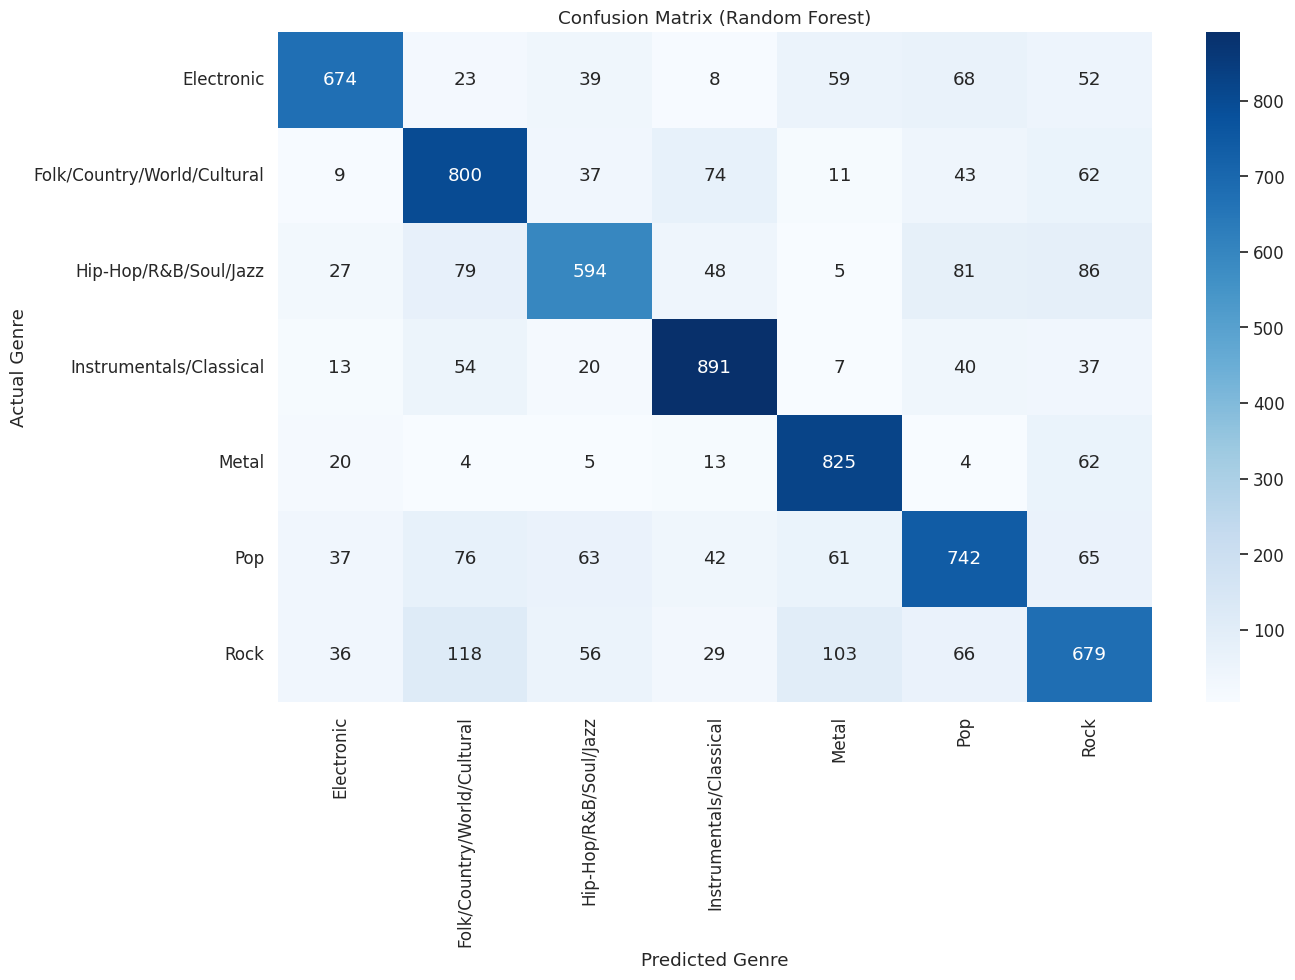

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)


plt.figure(figsize=(14, 10))
sb.set(font_scale=1.1)

# Generate the heatmap
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=genres_label, yticklabels=genres_label)
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.tight_layout()
plt.show()


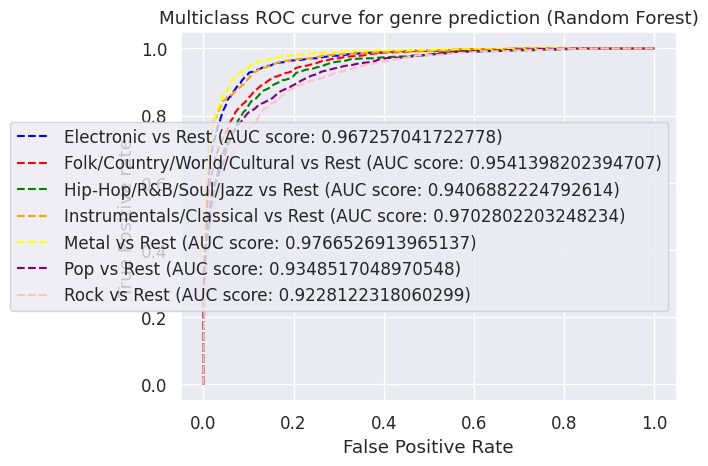

In [45]:
# Get the probability predictions for each genre
y_scores = rf_clf.predict_proba(X_test_scaled)
n_classes = 7

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = 7
class_labels = genres_label
colours = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'pink']

# Generate ROC curve of each genre against others with AOC score
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_scores[:,i], pos_label = i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colours[i], label=f'{class_labels[i]} vs Rest (AUC score: {roc_auc[i]})')

plt.title('Multiclass ROC curve for genre prediction (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Multinomial Logistic Regression
Classic algorithm that applies logistic regression to multiclass problem

In [56]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', max_iter=300)

# Train the model
log_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

print(f'Accuracy: {accuracy_log * 100:.5f}%')
print(classification_report(y_test, y_pred_log, digits=5, target_names = genres_label))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 88.03746%
                             precision    recall  f1-score   support

                 Electronic    0.87117   0.89382   0.88235       923
Folk/Country/World/Cultural    0.90223   0.89961   0.90092      1036
      Hip-Hop/R&B/Soul/Jazz    0.84088   0.82717   0.83397       920
    Instrumentals/Classical    0.90481   0.92185   0.91325      1062
                      Metal    0.89485   0.93033   0.91224       933
                        Pop    0.90711   0.84530   0.87512      1086
                       Rock    0.83880   0.84729   0.84302      1087

                   accuracy                        0.88037      7047
                  macro avg    0.87998   0.88077   0.88012      7047
               weighted avg    0.88053   0.88037   0.88020      7047



[[825   9  20   8  24  22  15]
 [  8 932  15  39   7  13  22]
 [ 32  25 761  21  10  30  41]
 [ 14  15  22 979   5   6  21]
 [ 15   0   3   7 868   2  38]
 [ 30  15  51  19  13 918  40]
 [ 23  37  33   9  43  21 921]]


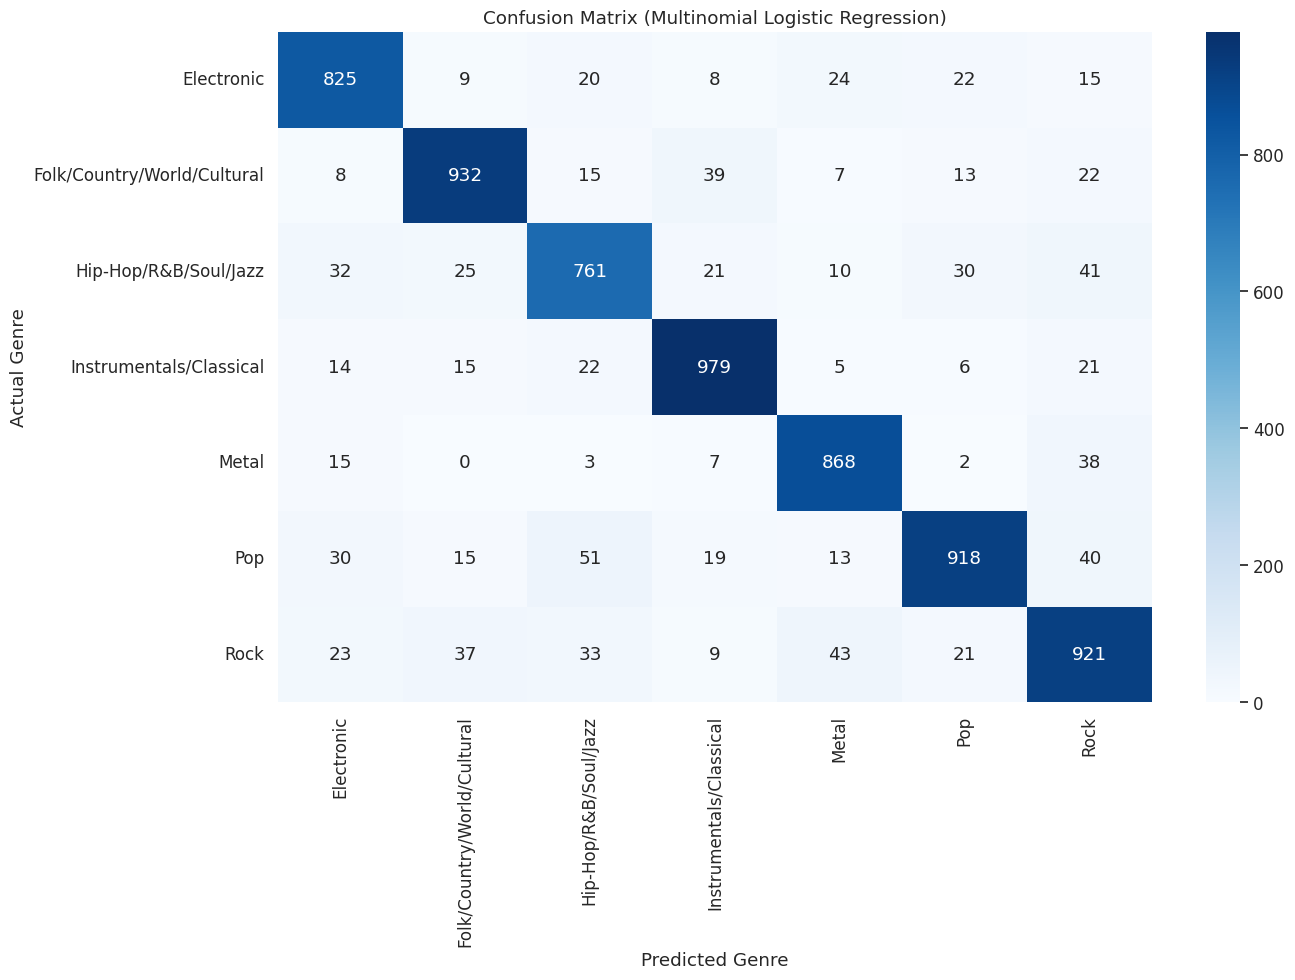

In [47]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print(conf_matrix)

plt.figure(figsize=(14, 10))
sb.set(font_scale=1.1)

# Generate the heatmap
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=genres_label, yticklabels=genres_label)
plt.title('Confusion Matrix (Multinomial Logistic Regression)')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.tight_layout()
plt.show()

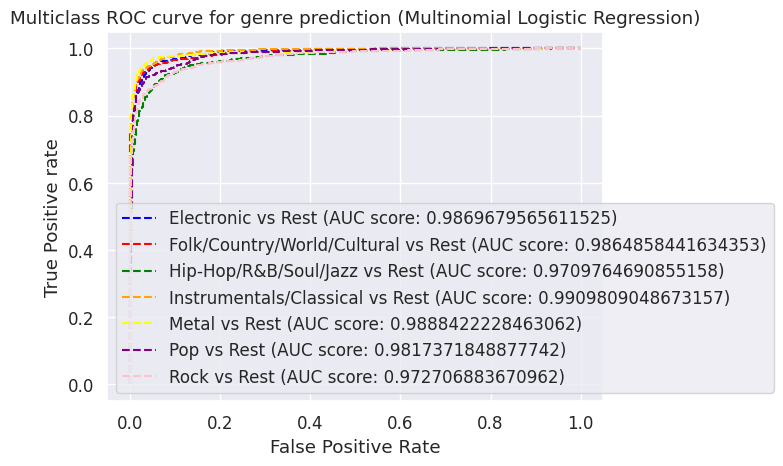

In [48]:
# Get the probability predictions for each genre
y_scores = log_clf.predict_proba(X_test_scaled)
n_classes = 7

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = 7
class_labels = genres_label
colours = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'pink']

# Generate ROC curve of each genre against others with AOC score
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_scores[:,i], pos_label = i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colours[i], label=f'{class_labels[i]} vs Rest (AUC score: {roc_auc[i]})')

plt.title('Multiclass ROC curve for genre prediction (Multinomial Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


## Results
Our result shows that the **Multinomial Logistic Regression** performs the best at classifying music genre with the highest **classification accuracy of 88.0%**. Similarly, this model beats the other two models in other metrics such as precision, recall and F1-score. It also boasts an impressive AUC score that is **higher than 0.9 (benchmark for outstanding discrimination ability) as well as other models' AUC score for each genre categories**. As such, we will be using this Multinomial Logistic Regression for genre prediction for recommender system.

## Exporting Model and Preprocessing Pipeline
We will use pickle to export our fitted model and Dataframe Mapper to be used for Part 3: Music Recommender System. Alternatively, you can use the prepared files in the Github Repository instead.

In [49]:
import pickle
with open('multinomial_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_clf, file)

In [50]:
with open('mapper.pkl', 'wb') as file:
    pickle.dump(mapper, file)

## References
[1] T. Chen and C. Guestrin, "XGBoost: A Scalable Tree Boosting System," in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2016, pp. 785-794, doi: 10.1145/2939672.2939785.